In [1]:
# Nome aluno 1: Professor Arthur
# RA aluno 1: 

# Nome aluno 2:
# RA aluno 2:

# Nome aluno 3:
# RA aluno 3:

# **Instruções para a Prova**

**Antes de iniciar, preencha o Nome e RA no bloco de código acima.**

### **Envio da Prova por apenas 1 integrante do grupo no formulário** https://forms.gle/TM3Lb9Cia2tk64Gy6

A prova deve ser realizada e enviada seguindo estas diretrizes:

**Não renomei o arquivo. Deve ser enviado com o nome "``Prova 1.ipynb``"**

1. **Composição do Grupo:**
   - A prova pode ser realizada individualmente ou em grupos de até 3 integrantes.

2. **Consultas:**
   - É permitido consultar materiais das aulas anteriores e anotações próprias.

3. **Integridade Acadêmica:**
   - Será atribuída nota zero à prova de alunos que forem flagrados compartilhando código com outros grupos, utilizando o Google ou Chat GPT durante a prova.
   - Alunos que enviarem prova de fraude acadêmica por outros grupos, mediante prova fotográfica enviada por e-mail, receberão nota máxima (SS). A identidade do informante será mantida em sigilo.

4. **Intervalo:**
   - Não haverá intervalos. Após a finalização da prova, o aluno estará livre para sair.

5. **Entrega da Prova:**
   - A prova deve ser entregue mantendo todos os blocos de markdown e de código originais, sem adicionar blocos adicionais. Blocos de código extras podem ser usados durante o desenvolvimento, mas a versão final deve conter apenas os blocos fornecidos inicialmente.
   - Todas as saídas dos blocos de código devem ser mantidas no envio (Ex: As métricas e o Gráfico)

6. **Atenção:**
   - Respostas corretas colocadas nas seções erradas não serão consideradas. É essencial colocar cada resposta na seção correspondente à sua questão.

**Boa sorte!**


# Importe todas as bibliotecas no bloco de código abaixo
- Cada bibliotecas importada e não utilizada irá reduzir meio ponto da nota.
- Cada bibliotecas importada mais de uma vez irá reduzir meio ponto da nota.
- Cada bibliotecas importada fora do bloco de código abaixo irá reduzir meio ponto da nota.

In [2]:
# Importe as bibliotecas neste bloco de código
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1 - Leia a base 'dados_corretor_imoveis.csv' e faça o tratamento de dados descrito abaixo:

In [3]:
# 1 - Desenvolva o Código aqui!
df = pd.read_csv('dados_corretor_imoveis.csv')

- A - Crie uma coluna chamada "vendido" com valor `0` se o valor de status for `for_sale` e `1` se for `sold`. (apague a coluna status)



In [4]:
# A - Desenvolva o Código aqui!
df['vendido'] = df['status'].apply(lambda x: 1 if x == 'sold' else 0)
df.drop(['status'], axis = 1, inplace = True)

- B - Tire todas as casas decimais das colunas numéricas



In [5]:
# B - Desenvolva o Código aqui!
# Criando uma lista com os nomes das colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Removendo casas decimais e convertendo para inteiro
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.astype('int'))

- C - Crie uma coluna binária (0 ou 1) para cada um dos 10 estados mais frequentes na "coluna ", identifique primeiramente os 10 estados com maior número de ocorrências. Em seguida, para cada um desses estados, crie uma nova coluna no DataFrame, nomeando-a com o nome do estado, e atribua o valor 1 se a casa estiver nesse estado e 0 caso contrário. Casas localizadas fora desses 10 estados devem ter o valor 0 em todas essas novas colunas. Finalize removendo a coluna "estado" do DataFrame.

In [6]:
# C - Desenvolva o Código aqui!
estados_que_mais_aparecem = list(df.estado.value_counts().index[:10])
for estado in estados_que_mais_aparecem:
    df[estado] = df['estado'].apply(lambda x: 1 if x == estado else 0)

df.drop('estado', axis=1, inplace=True)

- D - Separe os dados em X (os atributos) e y (a coluna valor)



In [7]:
# D - Desenvolva o Código aqui!
X = df.drop('valor', axis = 1)
y = df[['valor']]

- E - Separe os dados em treinamento (30%), validação (20%) e teste (50%).

In [8]:
# E - Desenvolva o Código aqui!
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.7)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.2 / 0.7)

- F - Normalize  os dados com Standard Scale

In [9]:
# F - Desenvolva o Código aqui!
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
X_val = scaler_X.transform(X_val)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)
y_val = scaler_y.transform(y_val)

# 2 Defina e compile um modelo para prever o valor com as seguintes caracterìsticas:
- Para o modelo:
    - Tenha 5 camadas ocultas, respectivamente com 128, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao Tangente Hiperbólica nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador rmsprop;
    - O loss adequado para o tipo de previsão;
    - A métrica de erro médio absoluto;
- Chame o modelo de "`model_1`";

In [10]:
# 2 - Desenvolva o Código aqui!
# Definindo o modelo
model_1 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),  # Camada de entrada e primeira camada oculta com 128 neurônios
    Dense(64, activation='tanh'),  # Segunda camada oculta com 64 neurônios
    Dense(32, activation='tanh'),  # Terceira camada oculta com 32 neurônios
    Dense(16, activation='tanh'),  # Quarta camada oculta com 16 neurônios
    Dense(8, activation='tanh'),   # Quinta camada oculta com 8 neurônios
    Dense(1)  # Camada de saída
])

# Compilando o modelo
model_1.compile(optimizer='rmsprop',  # Otimizador RMSprop
              loss='mean_squared_error',  # Perda de erro quadrático médio, adequada para regressão
              metrics=['mae'])  # Métrica de Erro Médio Absoluto

c:\Users\arthu\.conda\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.3, paciência de 3 e valor mínimo para 0.000001, monitorando o loss de validação;
    - Parada antecipada do modelo se ficar 10 épocas sem melhorar o loss de validação
- Treine o modelo por 20 épocas;
- Passe 256 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [11]:
# 3 - Desenvolva o Código aqui!

# Definindo os callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.000001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

callbacks_list = [reduce_lr, early_stop]

# Treinamento do modelo
history = model_1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks_list,
                    verbose=1)

Epoch 1/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7627 - mae: 0.2431 - val_loss: 0.6348 - val_mae: 0.2221 - learning_rate: 0.0010
Epoch 2/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6522 - mae: 0.2264 - val_loss: 0.6072 - val_mae: 0.2262 - learning_rate: 0.0010
Epoch 3/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7021 - mae: 0.2297 - val_loss: 0.5983 - val_mae: 0.2538 - learning_rate: 0.0010
Epoch 4/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5889 - mae: 0.2273 - val_loss: 0.5780 - val_mae: 0.2266 - learning_rate: 0.0010
Epoch 5/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6732 - mae: 0.2274 - val_loss: 0.5840 - val_mae: 0.2173 - learning_rate: 0.0010
Epoch 6/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5556 - mae: 0.2259 - val_loss: 0.5776 - val_mae: 0.2254 - learning_rate: 0.0010
Epoch 7/20
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5146 - mae: 0.2253 - val_loss: 0.5666 - val_mae: 0.2248 - learning_rate

# 4 - Exiba os valores de loss e erro médio absoluto de validação e treinamento ao longo das épocas.

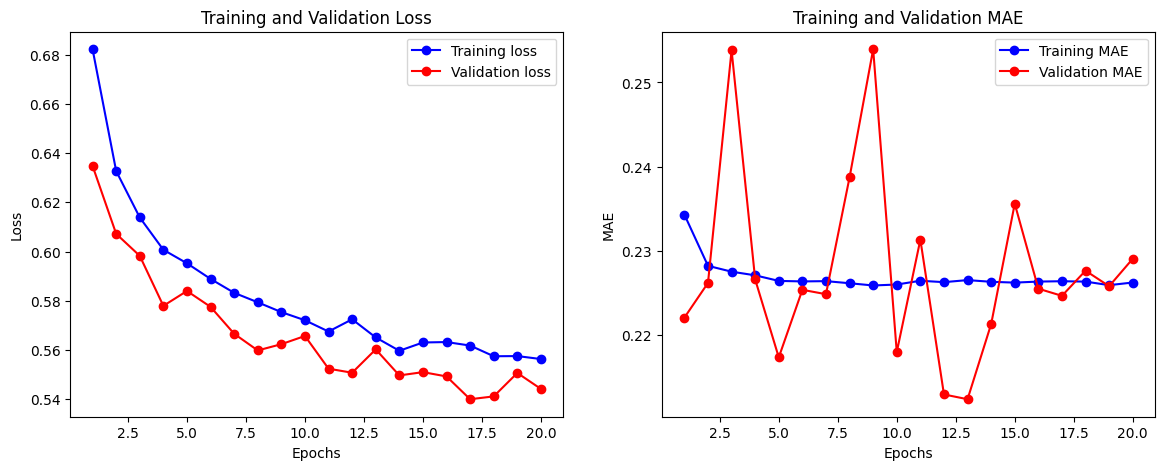

In [12]:
# 4 - Desenvolva o Código aqui!
# Extraindo os valores do objeto history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Plotando o loss de treinamento e validação
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotando o MAE de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 5 - Calcule o MSE, RMSE e MAE para os dados de teste. 
- Adeque os valores para que as métricas sejam geradas com os valores reais. 

In [13]:
# 5 - Desenvolva o Código aqui!
y_pred = scaler_y.inverse_transform(model_1.predict(X_test))
y_test_desnorm = scaler_y.inverse_transform(y_test)
# Calculando MSE
mse = mean_squared_error(y_test_desnorm, y_pred)
print(f'MSE: {mse}')

# Calculando RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calculando MAE
mae = mean_absolute_error(y_test_desnorm, y_pred)
print(f'MAE: {mae}')

21262/21262 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
MSE: 7946968418278.557
RMSE: 2819036.7890963317
MAE: 261548.9247300054


# Extra Valendo 1 ponto:
- Crie um gráfico comparando os valores reais e valores preditos;
- Para o gráfico ficar viável, utilize apenas as primeiras 200 amostras;
- Para melhorar a visualização do gráfico, coloque os dados em ordem crescente pelo valor real.

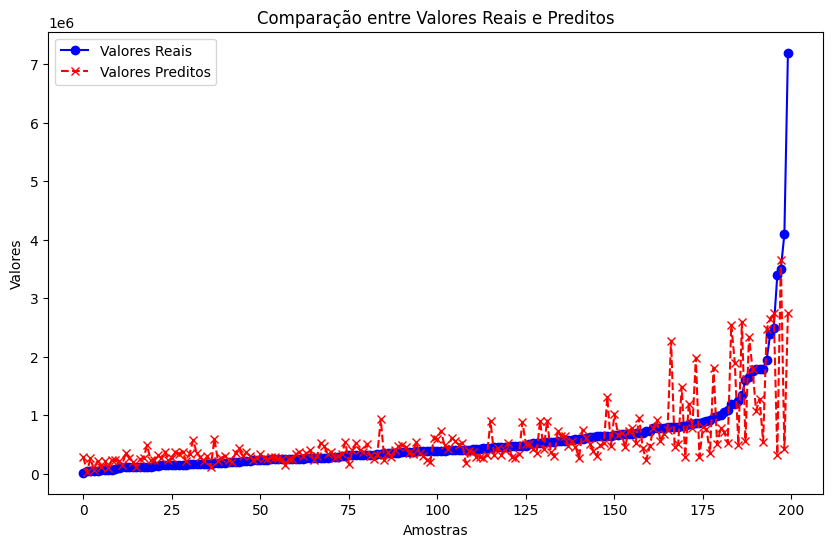

In [14]:
# Desenvolva o Código aqui!
df_comparacao = pd.DataFrame({'Predito':list(y_pred[:200].flatten()), 'Real':list(y_test_desnorm[:200].flatten())})
df_comparacao.sort_values(by='Real', inplace = True)
# Plotando os valores reais e preditos
plt.figure(figsize=(10, 6))
plt.plot(list(df_comparacao['Real']), label='Valores Reais', color='blue', marker='o')
plt.plot(list(df_comparacao['Predito']), label='Valores Preditos', color='red', linestyle='--', marker='x')
plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

# 6 - Leia a base de dados metaverse_transactions_dataset.csv e faça o tratamento de dados abaixo:


In [15]:
# 6 - Desenvolva o Código aqui!
df = pd.read_csv('metaverse_transactions_dataset.csv')

- A - Apague as colunas timestamp, sending_address, receiving_address e purchase_pattern


In [16]:
# A - Desenvolva o Código aqui!
df.drop(['timestamp', 'sending_address', 'receiving_address', 'purchase_pattern'], axis=1, inplace=True)

- B - Transforme as colunas location_region e ip_prefix, com get dummies ou one_hot _encoder (ou com o loc) de forma a criar uma coluna binária para cada possível valor. Por fim apague as colunas originais (se ainda existirem)


In [17]:
# B - Desenvolva o Código aqui!
colunas_para_dummies = ['location_region', 'ip_prefix']
df = pd.get_dummies(df, columns=colunas_para_dummies)
for col in df.columns[df.dtypes == 'bool'].tolist():
    df[col] = df[col].astype(int)

- C - Transforme a coluna age_group em numérica transformando os valores new para 0, established para 1 e veteran 22


In [18]:
# C - Desenvolva o Código aqui!
age_group_mapping = {'new': 0, 'established': 1, 'veteran': 22}
df['age_group'] = df['age_group'].map(age_group_mapping)

- D - Transforme a coluna anomaly em numérica transformando os valores low_risk para 0, moderate_risk para 1 e high_risk 2

In [19]:
# D - Desenvolva o Código aqui!
anomaly_mapping = {'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2}
df['anomaly'] = df['anomaly'].map(anomaly_mapping)

- E - Separe os dados em X e y (transaction_type)

In [20]:
# E - Desenvolva o Código aqui!
X = df.drop('transaction_type', axis = 1)
y = df[['transaction_type']]

- F - Separe os dados em treinamento (70%), validação (15%) e teste (15%)

In [21]:
# F - Desenvolva o Código aqui!
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5)

- G - Normalize os dados com MinMaxScaler

In [22]:
# G - Desenvolva o Código aqui!
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
X_val = scaler_X.transform(X_val)

- H - Transforme os dados de y para se adequar a uma classificação multiclasse 

In [23]:
# H - Desenvolva o Código aqui!
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_val = encoder.transform(y_val.values.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# 7 Defina e compile um modelo para prever o tipo da transação com as seguintes caracterìsticas:
- Para o modelo:
    - Tenha 6 camadas ocultas, respectivamente com 64, 64, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao relu nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador adam;
    - O loss adequado para o tipo de previsão;
    - A métrica de acurácia;
- Chame o modelo de "`model_2`";

In [24]:
# 7 - Desenvolva o Código aqui!
n_classes = y_train[0].shape[0]

# Definir o modelo
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada e a primeira camada oculta com 64 neurônios
    Dense(64, activation='relu'),  # Segunda camada oculta
    Dense(64, activation='relu'),  # Terceira camada oculta
    Dense(32, activation='relu'),  # Quarta camada oculta
    Dense(16, activation='relu'),  # Quinta camada oculta
    Dense(8, activation='relu'),   # Sexta camada oculta
    Dense(n_classes, activation='softmax')  # Camada de saída
])

# Compilar o modelo
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' se suas labels estiverem como inteiros
    metrics=['accuracy']
)

c:\Users\arthu\.conda\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 8 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.35, paciência de 4 e valor mínimo para 0.00001, monitorando a acurácia de validação;
    - Parada antecipada do modelo se ficar 15 épocas sem melhorar o loss de validação
- Treine o modelo por 150 épocas;
- Passe 128 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [25]:
# 8 - Desenvolva o Código aqui!
# Definindo os callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitorar a acurácia de validação
    factor=0.35,             # Fator de redução da taxa de aprendizado
    patience=4,              # Número de épocas sem melhoria após o qual a taxa de aprendizado será reduzida
    min_lr=0.00001           # Valor mínimo que a taxa de aprendizado pode atingir
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorar o loss de validação
    patience=15          # Número de épocas sem melhoria após o qual o treinamento será interrompido
)

# Treinamento do modelo
history = model_2.fit(
    X_train, y_train,                # Dados de treinamento
    validation_data=(X_val, y_val),  # Dados de validação
    epochs=150,                      # Número total de épocas
    batch_size=128,                  # Número de amostras por atualização do gradiente
    callbacks=[reduce_lr, early_stopping],  # Lista de callbacks
    verbose=1                        # Mostrar o progresso do treinamento para cada época
)

Epoch 1/150


430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5373 - loss: 0.9219 - val_accuracy: 0.8977 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 2/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.2166 - val_accuracy: 0.9228 - val_loss: 0.1722 - learning_rate: 0.0010
Epoch 3/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9255 - loss: 0.1605 - val_accuracy: 0.9363 - val_loss: 0.1385 - learning_rate: 0.0010
Epoch 4/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9294 - loss: 0.1468 - val_accuracy: 0.9374 - val_loss: 0.1296 - learning_rate: 0.0010
Epoch 5/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9328 - loss: 0.1387 - val_accuracy: 0.9193 - val_loss: 0.1709 - learning_rate: 0.0010
Epoch 6/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9310 - loss: 0.1432 - val_accuracy: 0.9361 - val_loss: 0.1296 - learning_rate: 0.0010
Epoch 7/150
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9380 - loss: 0.1261 - val_a

# 9 - Exiba os valores de loss e acurácia de validação e treinamento ao longo das épocas.

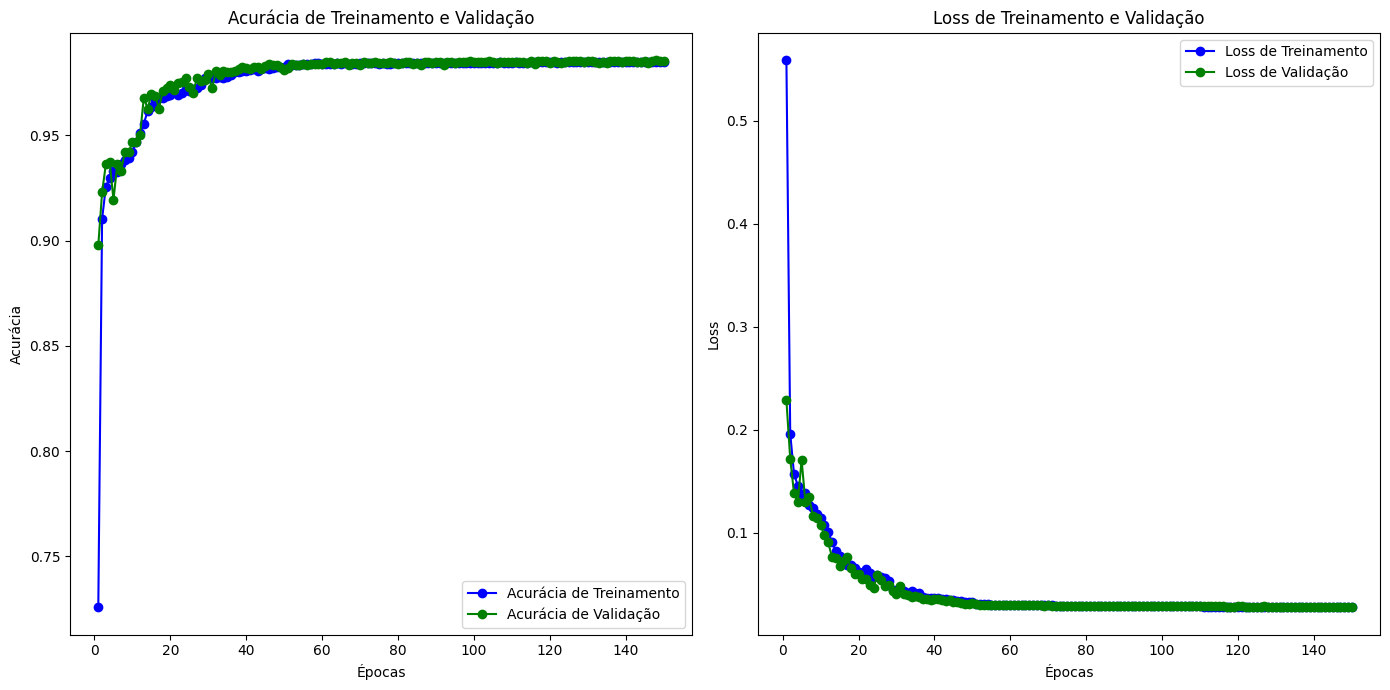

In [26]:
# 9 - Desenvolva o Código aqui!
# Extraindo os valores do objeto history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Criando gráfico para a acurácia
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Acurácia de Treinamento')
plt.plot(epochs, val_acc, 'go-', label='Acurácia de Validação')
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Criando gráfico para o loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Loss de Treinamento')
plt.plot(epochs, val_loss, 'go-', label='Loss de Validação')
plt.title('Loss de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 10 - Exiba as métricas de validaçao do modelo abaixo:

In [27]:
# Faça a previsão neste bloco de código
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Use isso se y_test estiver em one-hot encoding; caso contrário, ajuste conforme necessário

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


- A - Relatório de Classificação


In [28]:
# A - Desenvolva o Código aqui!
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_classes))

Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.89      0.67      0.76       407
           1       1.00      1.00      1.00      3741
           2       1.00      1.00      1.00      3680
           3       0.80      0.94      0.86       570
           4       1.00      1.00      1.00      3392

    accuracy                           0.98     11790
   macro avg       0.94      0.92      0.92     11790
weighted avg       0.98      0.98      0.98     11790



- B - F1 Score


In [29]:
# B - Desenvolva o Código aqui!
print("F1 Score (Médio):")
print(f1_score(y_true, y_pred_classes, average='weighted'))

F1 Score (Médio):
0.982842938934315


- C - Matriz de confusão com gráfico de calor

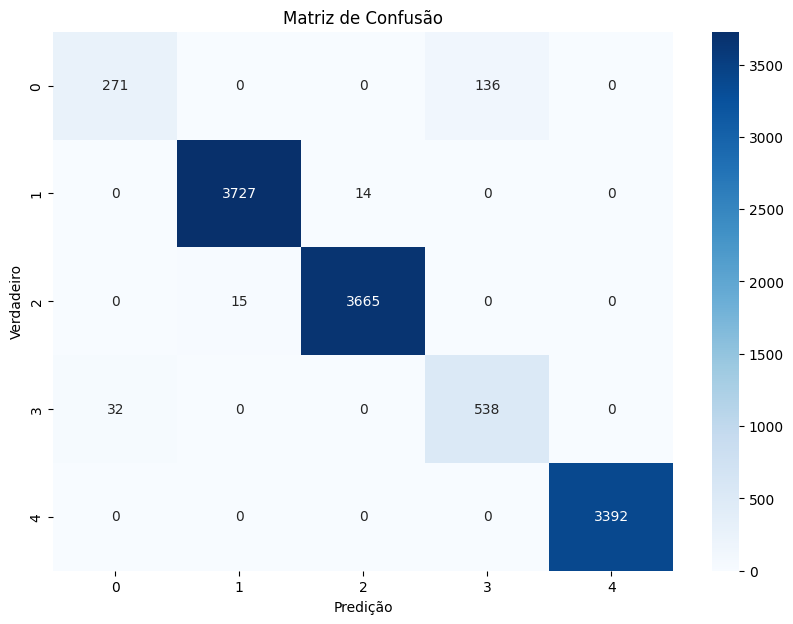

In [30]:
# C - Desenvolva o Código aqui!
# Calcular a matriz de confusão
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plotar a matriz de confusão com Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()